Burhan ÖZKESEMEN 21040301011

# kütüphanelerin yüklenmesi

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.metrics as mt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# veri setini yükleme

In [ ]:
import pandas as pd

veriSeti = pd.read_csv("veri-seti.txt", sep="\t")


In [ ]:
print(veriSeti)

      6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]


herhangi bir eksik verimiz var mı kontrol ediyoruz

In [ ]:
print(veriSeti.isnull().sum())

6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64


In [ ]:
print(veriSeti.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Sütun adlarını belirleme
veriSeti.columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Class"]

# Veriyi kontrol etme
print(veriSeti.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       85             66             29        0  26.6   
1            8      183             64              0        0  23.3   
2            1       89             66             23       94  28.1   
3            0      137             40             35      168  43.1   
4            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Class  
0                     0.351   31      0  
1                     0.672   32      1  
2                     0.167   21      0  
3                     2.288   33      1  
4                     0.201   30      0  


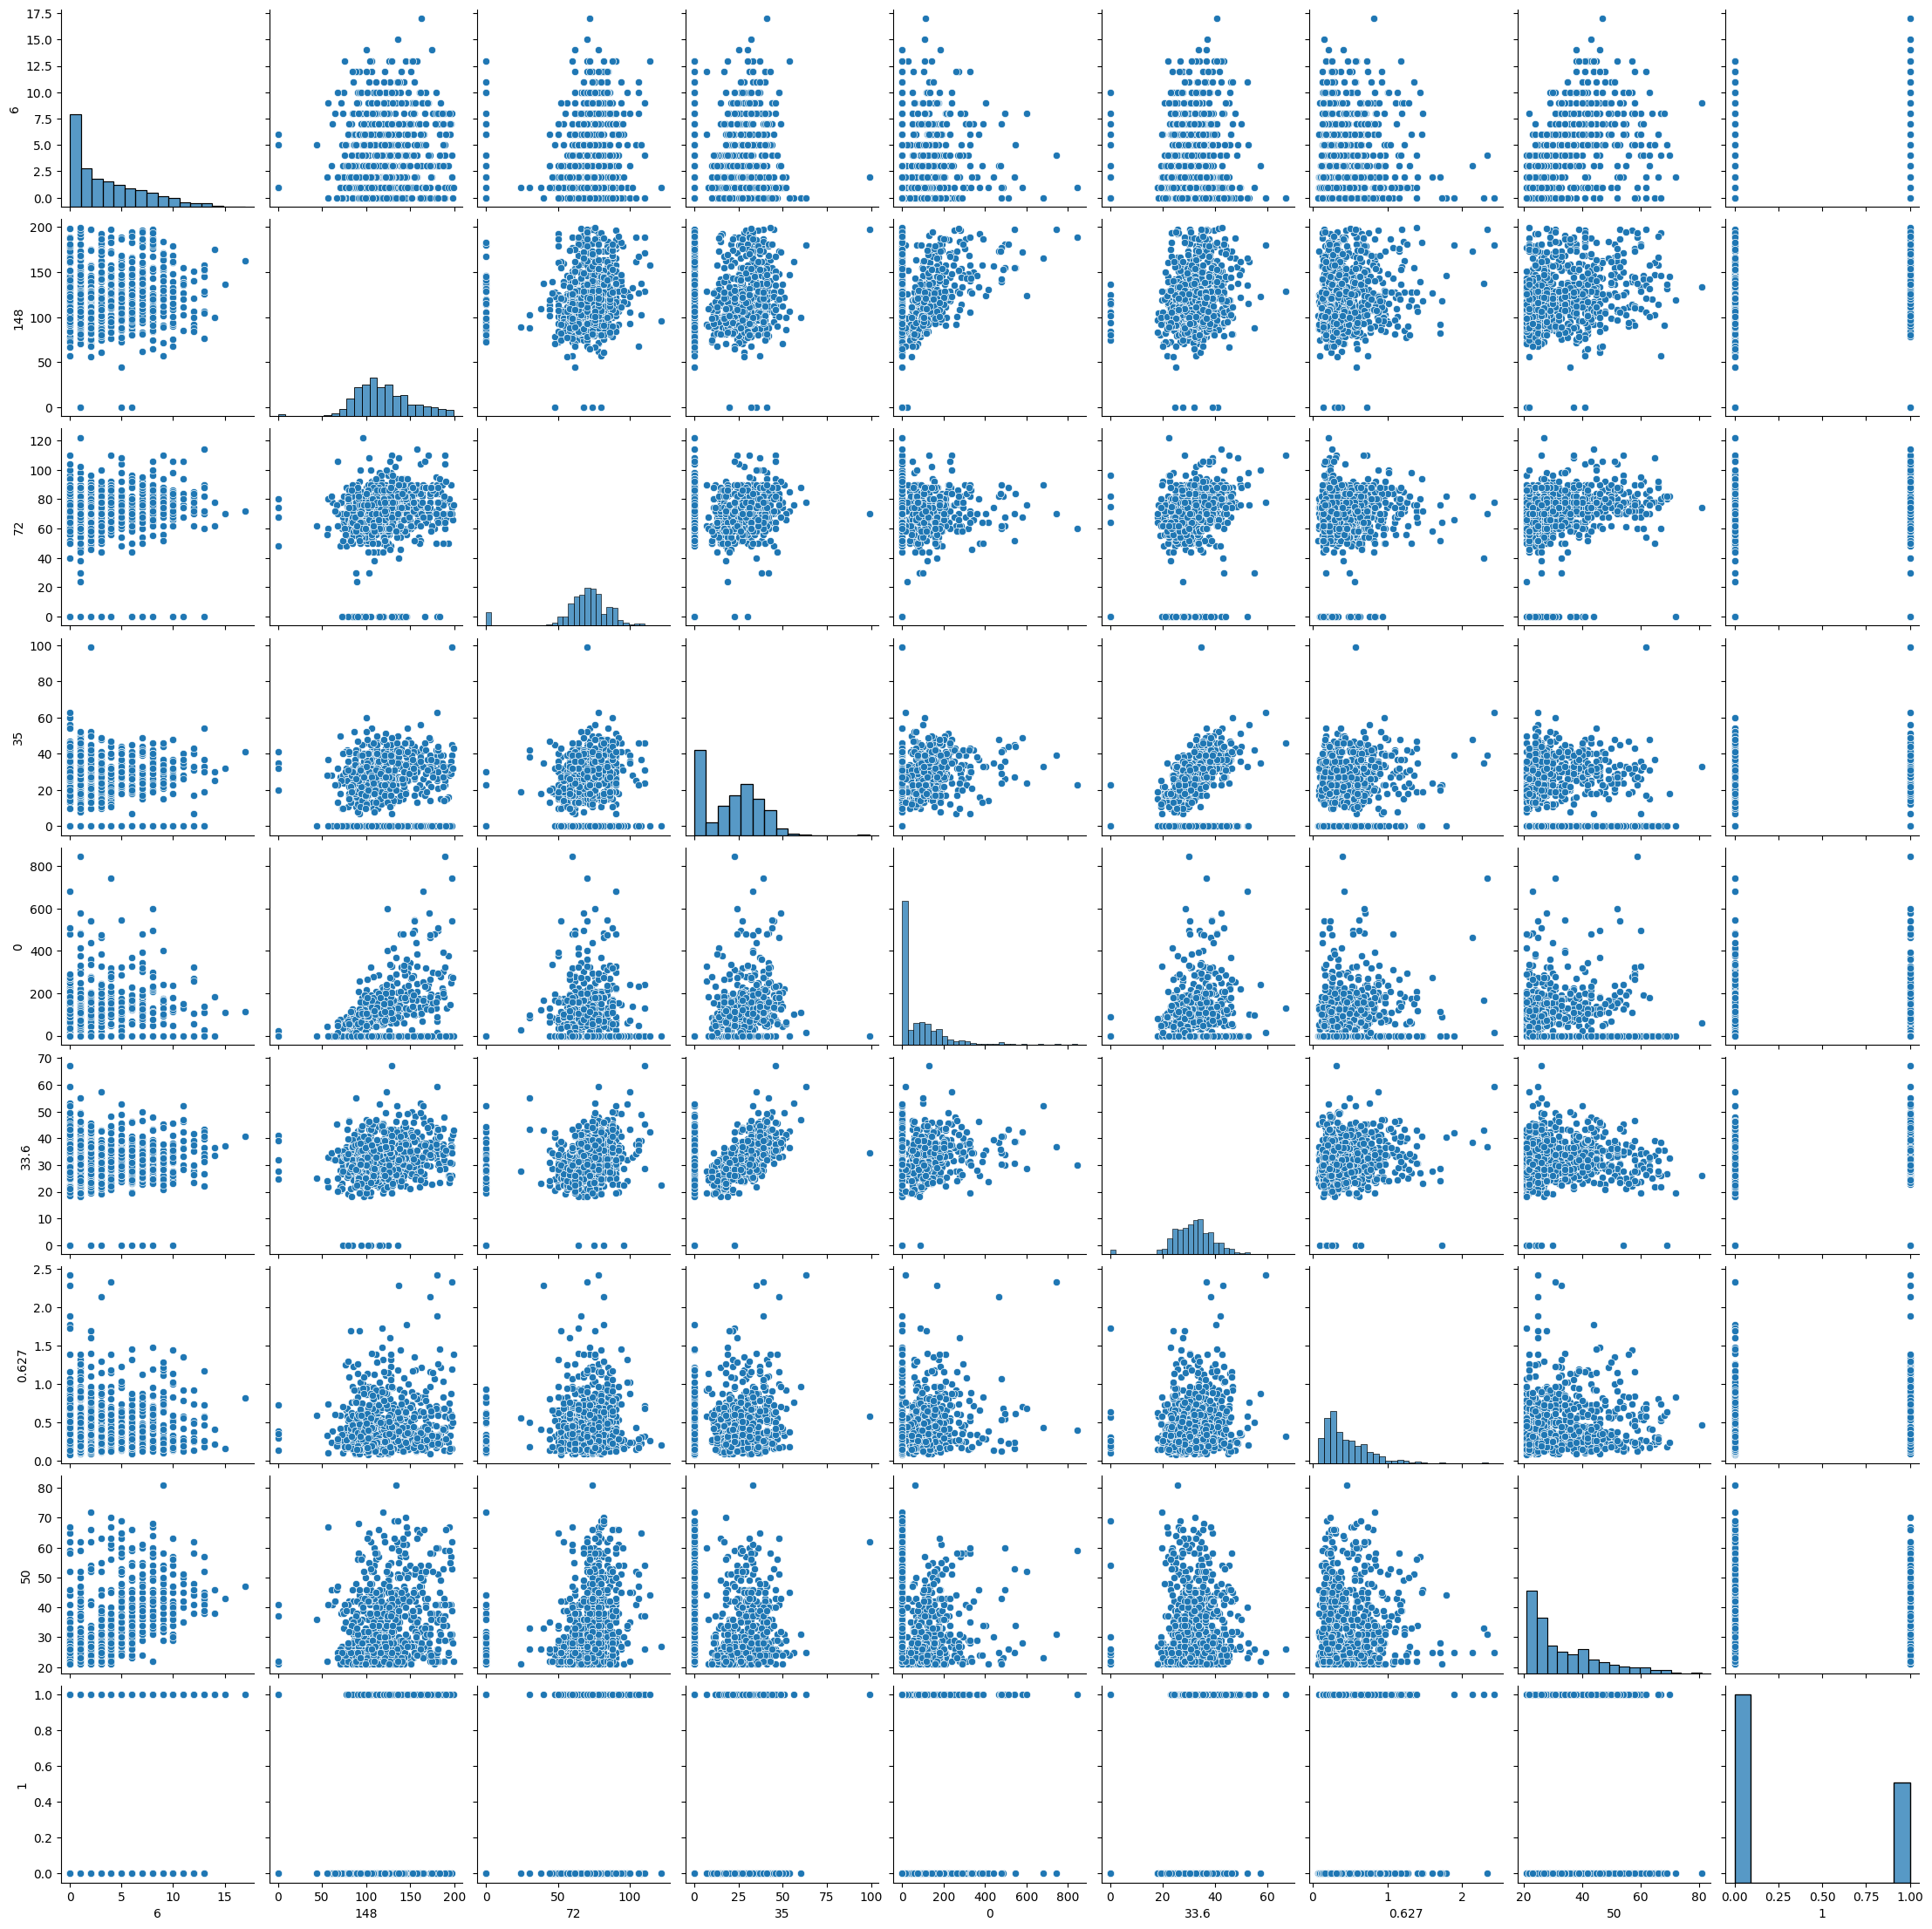

In [ ]:
#bunu yapmamızın sebebi temel bileşen analizi yapmadan önce veri setimizin ne kadar karmaşık olduğunu görmek
sns.pairplot(veriSeti)
plt.show()

# Normalizayon İşlemleri

min- max normalize işlemini kullandım çünkü

 Min-max ile Sigmoid normalizasyonları kararsız kalınca Z-score ile aykırı verileri buldum eğer aykırı veri varsa min-max kullnamak daha mantıklı çünkü min-max normalizasyonu Aykırı değerlere duyarlıdır.





In [ ]:
# Normalizasyon işlemi
scaler = preprocessing.MinMaxScaler()
normalized_data = scaler.fit_transform(veriSeti.drop(columns="Class"))

# Normalizasyon sonrası veriyi pandas DataFrame'e dönüştürme
normalized_data = pd.DataFrame(normalized_data, columns=veriSeti.columns[:-1])
normalized_data["Class"] = veriSeti["Class"].values

# Normalizasyon sonrası veriyi kontrol etme
print(normalized_data.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
1     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
2     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
3     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
4     0.294118  0.582915       0.606557       0.000000  0.000000  0.381520   

   DiabetesPedigreeFunction       Age  Class  
0                  0.116567  0.166667      0  
1                  0.253629  0.183333      1  
2                  0.038002  0.000000      0  
3                  0.943638  0.200000      1  
4                  0.052519  0.150000      0  


In [ ]:
print(normalized_data)


     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
1       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
2       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
3       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
4       0.294118  0.582915       0.606557       0.000000  0.000000  0.381520   
..           ...       ...            ...            ...       ...       ...   
762     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
763     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
764     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
765     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
766     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

In [ ]:
#sigmoid_normalization
import numpy as np

def sigmoid_normalization(data):
    normalized_data1 = 1 / (1 + np.exp(-data))
    return normalized_data1

normalized_data_sigmoid = sigmoid_normalization(veriSeti)

print(normalized_data_sigmoid)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0       0.731059      1.0            1.0            1.0      0.5  1.0   
1       0.999665      1.0            1.0            0.5      0.5  1.0   
2       0.731059      1.0            1.0            1.0      1.0  1.0   
3       0.500000      1.0            1.0            1.0      1.0  1.0   
4       0.993307      1.0            1.0            0.5      0.5  1.0   
..           ...      ...            ...            ...      ...  ...   
762     0.999955      1.0            1.0            1.0      1.0  1.0   
763     0.880797      1.0            1.0            1.0      0.5  1.0   
764     0.993307      1.0            1.0            1.0      1.0  1.0   
765     0.731059      1.0            1.0            0.5      0.5  1.0   
766     0.731059      1.0            1.0            1.0      0.5  1.0   

     DiabetesPedigreeFunction  Age     Class  
0                    0.586860  1.0  0.500000  
1                    0.661951

In [ ]:
# Z-Skor ile aykırı hataları bulma
import numpy as np

def z_score(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = (data - mean) / std_dev
    return z_scores

z_scores = z_score(veriSeti)

# Aykırı değerlerin indekslerini bulma (örneğin, Z-Skoru ±3'ten büyük veya küçük olanlar)
outlier_indices = np.where(np.abs(z_scores) > 3)[0]



In [ ]:
print("Aykırı Değerlerin Z-Skorları:")
print(z_scores)
print("Aykırı Değerlerin İndeksleri:")
print(outlier_indices)


Aykırı Değerlerin Z-Skorları:
             6       148        72        35         0      33.6       0.627  \
0   -11.585604  1.407234  1.341830 -0.691697 -0.347443 -1.703230 -119.768868   
1    -9.507637  4.473795  1.238501 -2.510602 -0.347443 -2.121802 -118.799902   
2   -11.585604  1.532399  1.341830 -1.068022  0.468473 -1.512970 -120.324287   
3   -11.882456  3.034389 -0.001456 -0.315371  1.110790  0.389631 -113.921871   
4   -10.398194  2.377268  1.755149 -2.510602 -0.347443 -1.830070 -120.221655   
..         ...       ...       ...       ...       ...       ...         ...   
762  -8.913933  1.907897  1.858479  0.500000  1.214950 -0.904138 -120.312213   
763 -11.288751  2.565017  1.548490 -0.817138 -0.347443 -0.409461 -119.802072   
764 -10.398194  2.533726  1.651819 -1.068022  0.624712 -1.753966 -120.088837   
765 -11.585604  2.690183  1.031841 -2.510602 -0.347443 -1.259290 -119.774905   
766 -11.585604  1.657565  1.548490 -0.566255 -0.347443 -1.221238 -119.877537   

         

# Naive bayes

Veriyi Eğitim ve Test Setlerine Ayırma

In [ ]:
# Özellikler ve hedef değişkeni ayırma
X = normalized_data.drop(columns="Class")
y = normalized_data["Class"]

# Veriyi %70 eğitim, %30 test olacak şekilde ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Eğitim ve test setlerini kontrol etme
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)


Eğitim seti boyutu: (536, 8)
Test seti boyutu: (231, 8)


Naive Bayes Sınıflandırıcısını Uygulama

In [ ]:
# Naive Bayes modelini oluşturma ve eğitme
model = GaussianNB()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Sonuçları raporlama
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7229437229437229
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.80       151
           1       0.62      0.51      0.56        80

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.72      0.72       231



In [ ]:
# Sensitivity ve Specificity hesaplama # Doğruluk skoru hesaplama
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Accuracy: 0.7359307359307359
Sensitivity: 0.375
Specificity: 0.9271523178807947


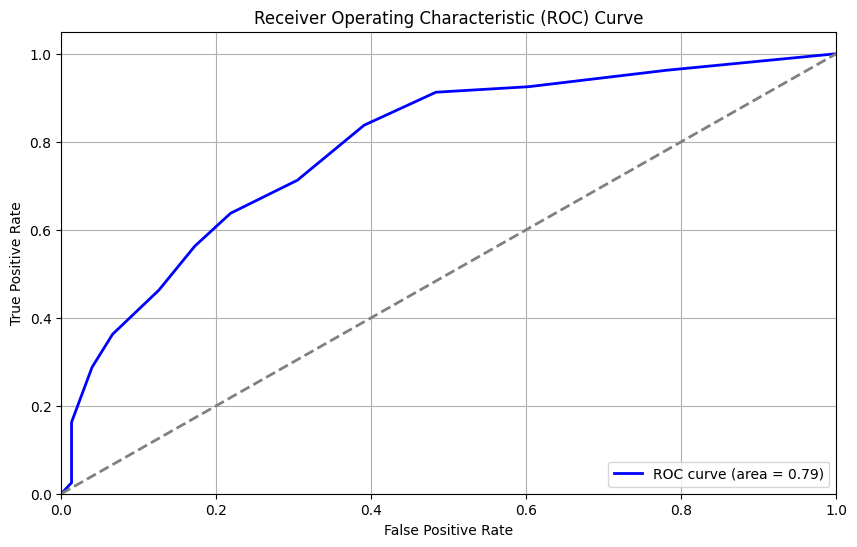

In [ ]:
# ROC Curve ve AUC hesaplama
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# ROC Curve görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Naive Bayes sınıflandırıcısıyla elde ettiğimiz sonuçlara göre, modelin doğruluğu oldukça kabul edilebilir görünmektedir. Ancak, hassasiyet ve geri çağırma değerlerine baktığımızda, modelin belirli sınıflar üzerinde daha dengeli bir performans sergilemesi gerektiği görülmektedir. Bu durum, modelin geliştirilerek daha iyi bir performans elde edilebileceğini göstermektedir. ROC eğrisini

#K-en yakın komşuluk sınıflandırıcısı




Veriyi Eğitim ve Test Setlerine Ayırma

In [ ]:
# Özellikler ve hedef değişkeni ayırma
X = normalized_data.drop(columns="Class")
y = normalized_data["Class"]

# Veriyi %70 eğitim, %30 test olacak şekilde ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Eğitim ve test setlerini kontrol etme
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)


Eğitim seti boyutu: (536, 8)
Test seti boyutu: (231, 8)


K-en Yakın Komşuluk Sınıflandırıcısını Uygulama ve 5. En İyi k Değerini Belirleme

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN modelini oluşturma
knn = KNeighborsClassifier()

# K değerleri için bir aralık belirleme
param_grid = {'n_neighbors': np.arange(1, 31)}

# GridSearchCV ile en iyi k değerini belirleme
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

# En iyi k değerini bulma
best_k = knn_gscv.best_params_['n_neighbors']
print("En iyi k değeri:", best_k)


En iyi k değeri: 15


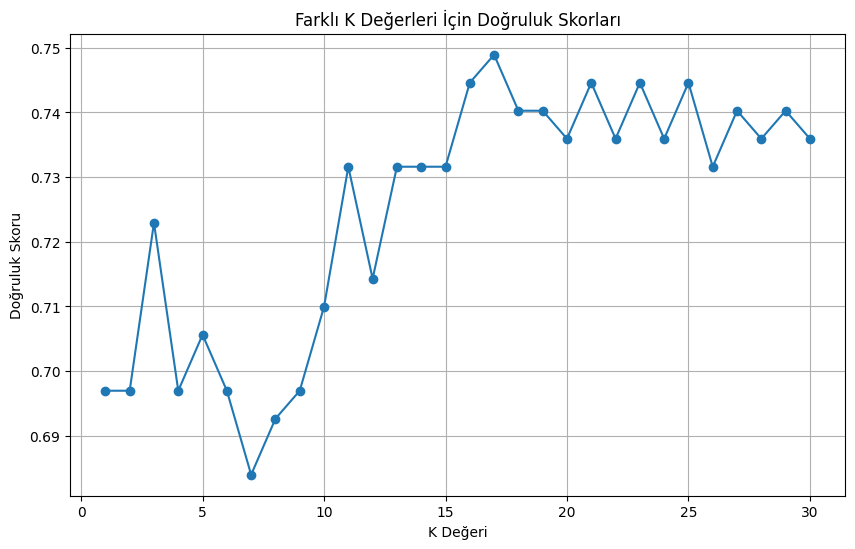

In [ ]:
# Farklı k değerleri için doğruluk skorlarını hesaplama
k_values = np.arange(1, 31)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('K Değeri')
plt.ylabel('Doğruluk Skoru')
plt.title('Farklı K Değerleri İçin Doğruluk Skorları')
plt.grid(True)
plt.show()

Sonuçları Raporlama

In [ ]:
# En iyi k değeri ile KNN modelini oluşturma ve eğitme
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Tahmin yapma
y_pred = best_knn.predict(X_test)

# Sonuçları raporlama
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7316017316017316
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81       151
           1       0.66      0.46      0.54        80

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



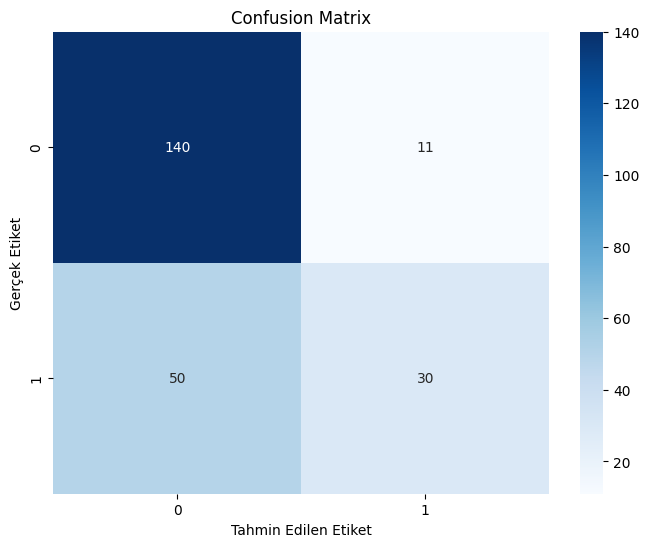

In [ ]:
import seaborn as sns

# Confusion Matrix görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Sensitivity ve Specificity hesaplama # Doğruluk skoru hesaplama
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Accuracy: 0.7359307359307359
Sensitivity: 0.375
Specificity: 0.9271523178807947


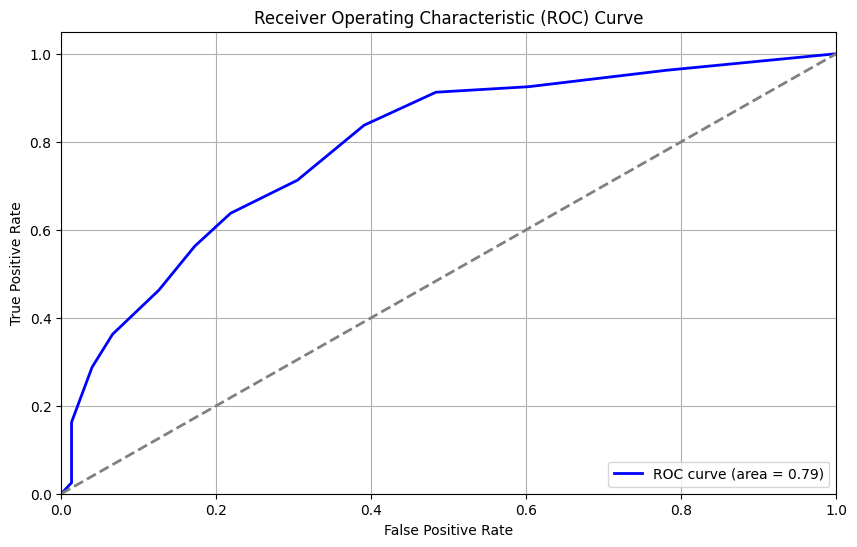

In [ ]:
# ROC Curve ve AUC hesaplama
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# ROC Curve görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM) sınıflandırıcı

In [ ]:
# Veriyi %70 eğitim, %30 test olacak şekilde ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


MLP modelini oluşturma ve eğitme

In [ ]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

SVM modelini oluşturma ve eğitme

In [ ]:
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

MLP ile tahmin yapma

In [ ]:
y_pred_mlp = mlp.predict(X_test)
y_pred_proba_mlp = mlp.predict_proba(X_test)[:, 1]

*SVM ile tahmin yapma*

In [ ]:
y_pred_svm = svm.predict(X_test)
y_pred_proba_svm = svm.predict_proba(X_test)[:, 1]


MLP için metrikleri hesaplama ve raporlama

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       151
           1       0.73      0.57      0.64        80

    accuracy                           0.78       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.78      0.77       231

MLP Confusion Matrix:
 [[134  17]
 [ 34  46]]
MLP Sensitivity: 0.575
MLP Specificity: 0.8874172185430463
MLP Accuracy: 0.7792207792207793
MLP F1-Score: 0.6978376542511039


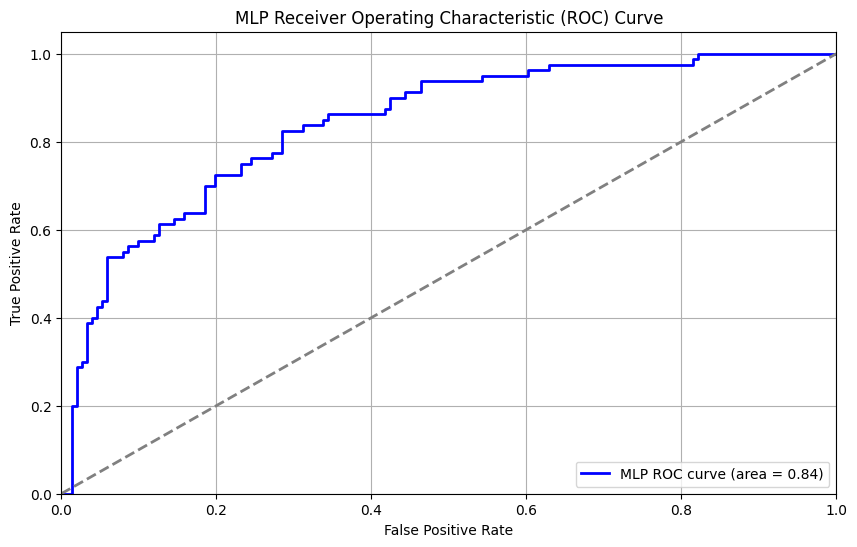

In [ ]:
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("MLP Confusion Matrix:\n", conf_matrix_mlp)
tn, fp, fn, tp = conf_matrix_mlp.ravel()
sensitivity_mlp = tp / (tp + fn)
specificity_mlp = tn / (tn + fp)
print("MLP Sensitivity:", sensitivity_mlp)
print("MLP Specificity:", specificity_mlp)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
f1_mlp = 2 * (sensitivity_mlp * specificity_mlp) / (sensitivity_mlp + specificity_mlp)
print("MLP F1-Score:", f1_mlp)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)
plt.figure(figsize=(10, 6))
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label='MLP ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

MLP Confusion Matrix görselleştirme

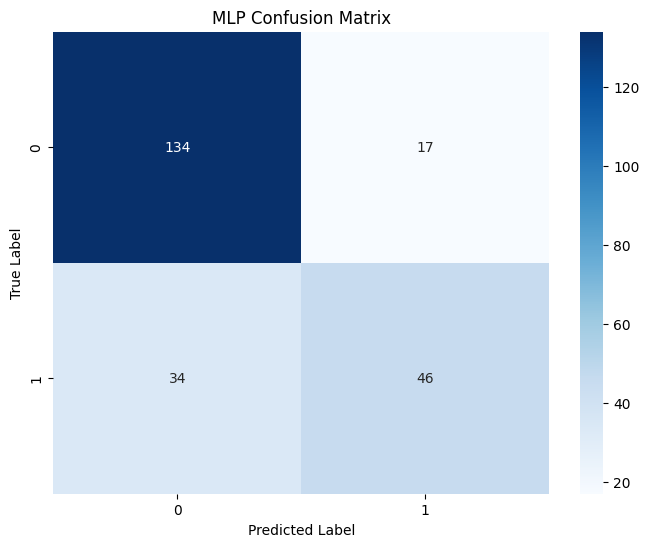

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MLP Confusion Matrix')
plt.show()


SVM için metrikleri hesaplama ve raporlama

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       151
           1       0.67      0.54      0.60        80

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231

SVM Confusion Matrix:
 [[130  21]
 [ 37  43]]
SVM Sensitivity: 0.5375
SVM Specificity: 0.8609271523178808
SVM Accuracy: 0.7489177489177489
SVM F1-Score: 0.6618125850944178


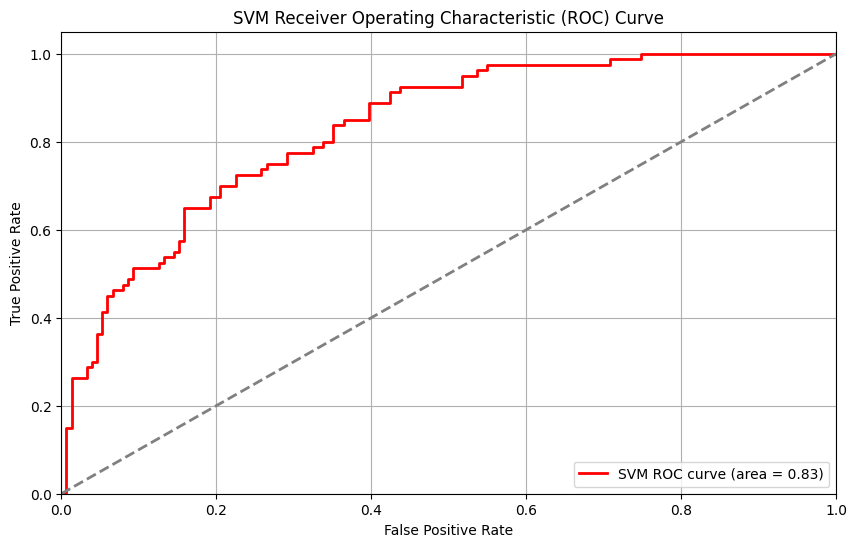

In [ ]:
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)
tn, fp, fn, tp = conf_matrix_svm.ravel()
sensitivity_svm = tp / (tp + fn)
specificity_svm = tn / (tn + fp)
print("SVM Sensitivity:", sensitivity_svm)
print("SVM Specificity:", specificity_svm)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
f1_svm = 2 * (sensitivity_svm * specificity_svm) / (sensitivity_svm + specificity_svm)
print("SVM F1-Score:", f1_svm)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

SVM Confusion Matrix görselleştirme

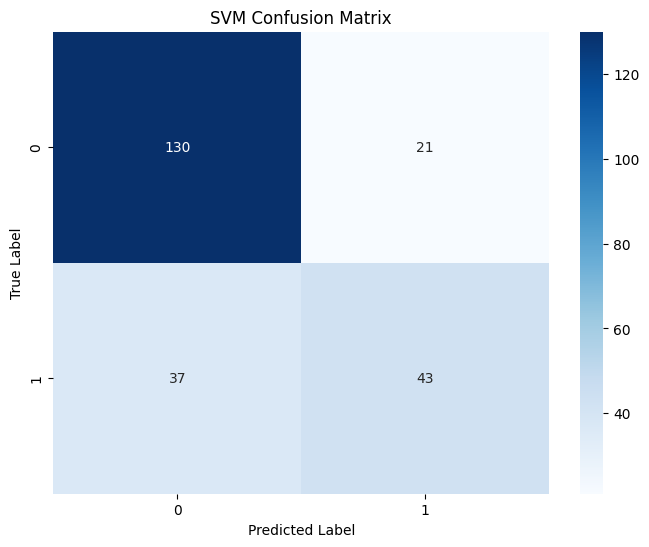

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()